# import libraries


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA


from sklearn.metrics import silhouette_score

# explore data

In [11]:
df=pd.read_csv("./Downloads/Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

# drop redundant columns

In [13]:
df.drop(['Column1','Column2' ,'Column3','Column4'],axis=1,inplace=True)
df.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

# drop irrelevant features

In [14]:
df.drop(['status_id','status_published'],axis=1,inplace=True)
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


# Normalize numerical data

In [33]:
norm=StandardScaler()
df.loc[:,~df.columns.isin(['status_type'])]=norm.fit_transform(df.loc[:,~df.columns.isin(['status_type'])])

df


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,photo,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
2,video,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748
3,photo,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
4,photo,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748
...,...,...,...,...,...,...,...,...,...,...
7045,photo,-0.305057,-0.252206,-0.304144,-0.280445,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
7046,photo,-0.462863,-0.252206,-0.304144,-0.447319,-0.293436,-0.147879,0.076713,-0.152587,-0.155748
7047,photo,-0.493128,-0.252206,-0.304144,-0.476244,-0.293436,-0.147879,-0.176010,-0.152587,-0.155748
7048,photo,0.261316,-0.238717,-0.136959,0.298053,-0.268417,-0.147879,-0.176010,-0.152587,-0.155748


# convert categorical data to numeric

In [40]:
df=pd.get_dummies(df,columns=['status_type'])
df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748,0,0,0,1
1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0,1,0,0
2,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748,0,0,0,1
3,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0,1,0,0
4,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,-0.305057,-0.252206,-0.304144,-0.280445,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0,1,0,0
7046,-0.462863,-0.252206,-0.304144,-0.447319,-0.293436,-0.147879,0.076713,-0.152587,-0.155748,0,1,0,0
7047,-0.493128,-0.252206,-0.304144,-0.476244,-0.293436,-0.147879,-0.176010,-0.152587,-0.155748,0,1,0,0
7048,0.261316,-0.238717,-0.136959,0.298053,-0.268417,-0.147879,-0.176010,-0.152587,-0.155748,0,1,0,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_reactions       7050 non-null   float64
 1   num_comments        7050 non-null   float64
 2   num_shares          7050 non-null   float64
 3   num_likes           7050 non-null   float64
 4   num_loves           7050 non-null   float64
 5   num_wows            7050 non-null   float64
 6   num_hahas           7050 non-null   float64
 7   num_sads            7050 non-null   float64
 8   num_angrys          7050 non-null   float64
 9   status_type_link    7050 non-null   uint8  
 10  status_type_photo   7050 non-null   uint8  
 11  status_type_status  7050 non-null   uint8  
 12  status_type_video   7050 non-null   uint8  
dtypes: float64(9), uint8(4)
memory usage: 523.4 KB


# Use clustering techniques without pca

# Using elbow method to get the opt K

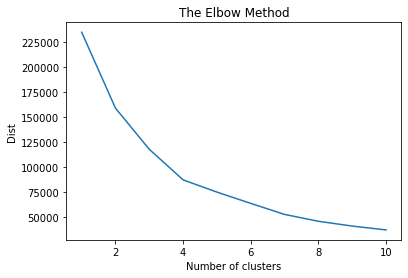

In [95]:
dist = []
X=df
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    dist.append(kmeans.inertia_)
plt.plot(range(1, 11), dist)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Dist')
plt.show()

In [72]:
db=DBSCAN(eps=0.5,min_samples=15)
hac = AgglomerativeClustering(4)
km = KMeans(7) #opt k=7
gm = GaussianMixture(4)

hac.fit(df)
km.fit(df)
gm.fit(df)
db.fit(df)

df["hac"] = hac.labels_
df["km"] = km.labels_
df["db"]=db.labels_
df["gm"] = gm.predict(df)

# compute silhoutte score

In [73]:
km_score=silhouette_score(df,df['km'])
hac_score=silhouette_score(df,df['hac'])
db_score=silhouette_score(df,df['db'])
gm_score=silhouette_score(df,df['gm'])

In [74]:
print(f'''kmeans_score={km_score},
hierarical_score={hac_score}
,dbsacn_score={db_score},
gaussian_mixture_score={gm_score}''')

kmeans_score=0.7117303772758241,
hierarical_score=0.5395173623977869
,dbsacn_score=0.7158568571364101,
gaussian_mixture_score=0.37097405485298257


# Using dimentionality reduction PCA

# Choose opt no of features

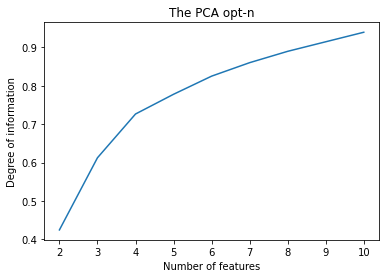

In [111]:
e_var
x=df
for i in range(2,10):
    pca=PCA(n_components=i)
    pca.fit_transform(x)
    e_var=np.cumsum(pca.explained_variance_ratio_)
    
    
plt.plot(range(2, 11), e_var)
plt.title('The PCA opt-n')
plt.xlabel('Number of features')
plt.ylabel('Degree of information')
plt.show()
    

# Trying pca at opt n=4

In [93]:
pca=PCA(n_components=4) #at n_features=4
df_reduced=pca.fit_transform(df)
pca.explained_variance_ratio_

array([0.42491307, 0.18764578, 0.11383066, 0.05133269])

# compute clustering with pca

In [75]:
db1=DBSCAN(eps=0.5,min_samples=5)
hac1 = AgglomerativeClustering(4)
km1 = KMeans(7)
gm1 = GaussianMixture(4)

hac1.fit(df_reduced)
km1.fit(df_reduced)
gm1.fit(df_reduced)
db1.fit(df_reduced)

df["hac1"] = hac1.labels_
df["km1"] = km1.labels_
df["db1"]=db1.labels_
df["gm1"] = gm1.predict(df_reduced)

In [76]:
km_score=silhouette_score(df,df['km1'])
hac_score=silhouette_score(df,df['hac1'])
db_score=silhouette_score(df,df['db1'])
gm_score=silhouette_score(df,df['gm1'])

In [77]:
print(f'''kmeans_score={km_score},
hierarical_score={hac_score}
,dbsacn_score={db_score},
gaussian_mixture_score={gm_score}''')

kmeans_score=0.6256810509392654,
hierarical_score=0.5405377143885508
,dbsacn_score=0.5867509651150847,
gaussian_mixture_score=0.5104864536027729


# trying pca at n=8

In [105]:
#at n_features=8
pca=PCA(n_components=8) #at n_features=8
df_reduced1=pca.fit_transform(df)
pca.explained_variance_ratio_

array([0.42491307, 0.18764578, 0.11383066, 0.05133269, 0.0471444 ,
       0.03508117, 0.02949917, 0.02482911])

In [112]:
db1=DBSCAN(eps=0.5,min_samples=5)
hac1 = AgglomerativeClustering(4)
km1 = KMeans(7)
gm1 = GaussianMixture(4)

hac1.fit(df_reduced1)
km1.fit(df_reduced1)
gm1.fit(df_reduced1)
db1.fit(df_reduced1)

df["hac1"] = hac1.labels_
df["km1"] = km1.labels_
df["db1"]=db1.labels_
df["gm1"] = gm1.predict(df_reduced1)

In [113]:
km_score=silhouette_score(df,df['km1'])
hac_score=silhouette_score(df,df['hac1'])
db_score=silhouette_score(df,df['db1'])
gm_score=silhouette_score(df,df['gm1'])

In [114]:
print(f'''kmeans_score={km_score},
hierarical_score={hac_score}
,dbsacn_score={db_score},
gaussian_mixture_score={gm_score}''')

kmeans_score=0.6207853311601093,
hierarical_score=0.485920323181474
,dbsacn_score=0.7528205944823891,
gaussian_mixture_score=0.4858626739430886
